In [2]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

def rrstr(x,n): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

v_rrstr = np.vectorize(rrstr)

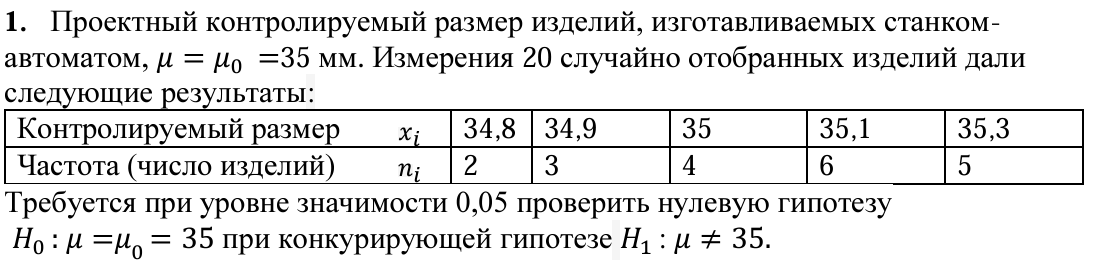

In [3]:
xi = np.array('34,8 34,9 35 35,1 35,3'.replace(',','.').split(' ')).astype(float)
ni = np.array('2 3 4 6 5'.split(' ')).astype(int)

X = np.repeat(xi,ni)

n = ni.sum()
mu0 = 35
alpha = 0.05
mu1 = np.dot(xi,ni)/n
sigma = ((np.dot(xi**2,ni)/n - mu1**2)*(n/(n-1)))**0.5

# Критическое значение для уровня значимости
z_crit =  norm.ppf(1-alpha/2)


# Мощность теста (a)
z =  (mu1 - mu0) / (sigma / np.sqrt(n))
z_power = z - z_crit
power = norm.cdf(z_power)

display(Math(r"\text{Мощность теста (W) при n = }"+str(n) + f': {v_rrstr(power,6)}'))


p_value_1 = 2*(1 - t(n-1).cdf(abs(z)))


# Вывод результатов
display(Math(r"\text{Тестовая статистика (z): }" + str(v_rrstr(z,3)) ))

display(Math(r"\text{P-значение для двустороннего теста: }"+ str(v_rrstr(p_value_1,4))))

# Проверка гипотезы
if alpha > p_value_1:
    display(Math("a) Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~') + r'\mu \neq ' + str(mu0)))
else:
    display(Math("a) Не хватает оснований отвергнуть нулевую гипотезу H_0.".replace(' ','~')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

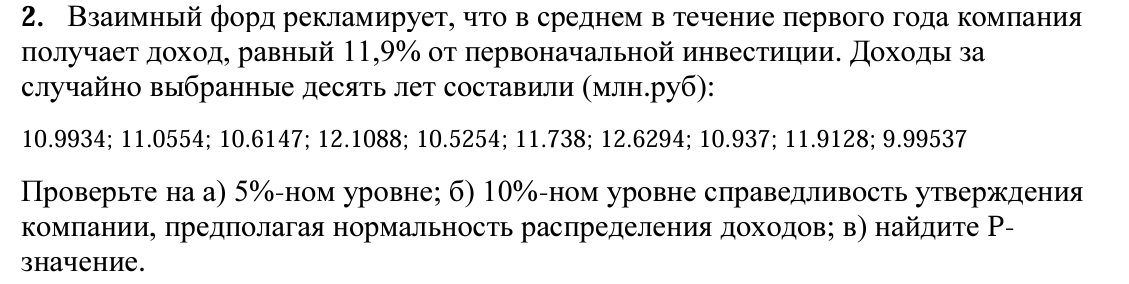

In [4]:
x = np.array('10.9934; 11.0554; 10.6147; 12.1088; 10.5254; 11.738; 12.6294; 10.937; 11.9128; 9.99537'.split('; ')).astype(float)
mu0 = 11.9
alpha = 0.05
n = x.size
x_sr = x.mean()
s = x.std(ddof=1)
se = s/np.sqrt(n)
t_obs = (x_sr - mu0)/se
t_cr = t.ppf(1-alpha/2,n-1)

p_val = 2 *(1 - t(n-1).cdf(abs(t_obs)))
display(Math(r"\text{P-значение для двустороннего теста: }"+ str(v_rrstr(p_val,4))))
# Проверка гипотезы
if alpha > p_val:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~') + r'\mu \neq ' + str(mu0)))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.".replace(' ','~')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
x = np.array('10.9934; 11.0554; 10.6147; 12.1088; 10.5254; 11.738; 12.6294; 10.937; 11.9128; 9.99537'.split('; ')).astype(float)
mu0 = 11.9
alpha = 0.1
n = x.size
x_sr = x.mean()
s = x.std(ddof=1)
se = s/np.sqrt(n)
t_obs = (x_sr - mu0)/se
t_cr = t.ppf(1-alpha/2,n-1)

p_val = 2 *(1 - t(n-1).cdf(abs(t_obs)))
display(Math(r"\text{P-значение для двустороннего теста: }"+ str(v_rrstr(p_val,4))))

# Проверка гипотезы
if alpha > p_val:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~') + r'\mu \neq ' + str(mu0)))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.".replace(' ','~')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

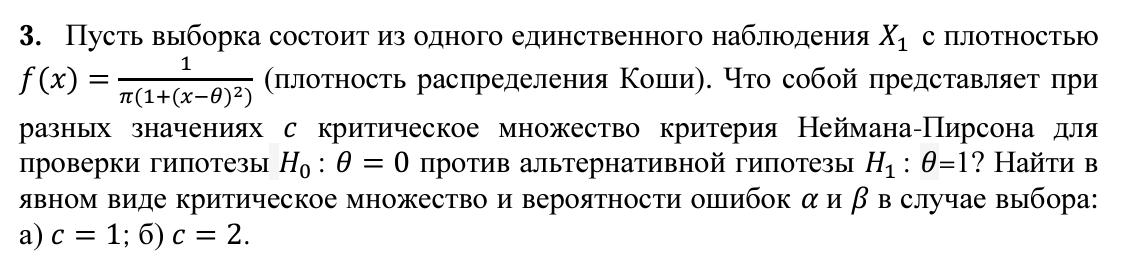

In [6]:
from sympy import symbols, solve, integrate, pi

# Обозначения
x, c = symbols('x c')
theta_0, theta_1 = 0, 1

# Отношение правдоподобия
likelihood_ratio = (1 + (x - theta_1)**2) / (1 + (x - theta_0)**2)

# Критическое множество: решаем неравенство
critical_set = solve(likelihood_ratio - c, x)

# Плотности распределения Коши
f_theta0 = 1 / (pi * (1 + x**2))          # При theta = 0
f_theta1 = 1 / (pi * (1 + (x - 1)**2))    # При theta = 1

# a) c = 1
c_value = 1
critical_set_a = [solve(likelihood_ratio.subs(c, c_value) - 1, x)]

# Ошибки первого и второго рода для c = 1
alpha_a = integrate(f_theta0, (x, critical_set_a[0][0],float('inf')))
beta_a = 1 - integrate(f_theta1, (x, critical_set_a[0][0], float('inf')))

# b) c = 2
c_value = 2
critical_set_b = [[2]]

# Ошибки первого и второго рода для c = 2
alpha_b = integrate(f_theta0, (x, critical_set_b[0][0], float('inf')))
beta_b = 1 - integrate(f_theta1, (x, critical_set_b[0][0], float('inf')))

# Вывод результатов
print(f"Для c = 1: α = {alpha_a.evalf():.4f}, β = {beta_a.evalf():.4f}")
print(f"Для c = 2: α = {alpha_b.evalf():.4f}, β = {beta_b.evalf():.4f}")

Для c = 1: α = 0.3524, β = 0.3524
Для c = 2: α = 0.1476, β = 0.7500


In [7]:
from sympy import symbols, solve, exp, log, pi

# Обозначения
X, mu0, mu1, sigma, alpha, k = symbols('X mu0 mu1 sigma alpha k')

# Отношение правдоподобия
lambda_ratio = exp(-(X - mu0)**2 / (2 * sigma**2) + (X - mu1)**2 / (2 * sigma**2))

# Критическое множество: решаем для критического значения X
critical_set = solve(lambda_ratio - k, X)

# Выражение для критического значения k через уровень значимости alpha
# k = exp(-log(1/alpha)) => логарифмическое преобразование для поиска c
k_value = exp(log(1 / alpha))

# Найти c для одного наблюдения X
critical_value = solve(lambda_ratio - k_value, X)

# Вывод критического множества
display("Критическое множество:", critical_set[0])
display("Критическое значение (c):", critical_value[0])


'Критическое множество:'

(mu0**2/2 - mu1**2/2 - sigma**2*log(1/k))/(mu0 - mu1)

'Критическое значение (c):'

(mu0**2/2 - mu1**2/2 - sigma**2*log(alpha))/(mu0 - mu1)